## Problem Statement
A bank manager is uncomfortable with more and more customers leaving their credit card services. They would really appreciate it if someone could predict who will be affected so that they can proactively go to the customer to provide them with better services and turn customer decisions in the opposite direction.

### First Things First; What is Churn?
The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

In [55]:
# All imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [56]:
# Load data
pd.set_option('display.max_columns', None)
data = pd.read_csv('./data/BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### EDA

We can notice that,
1. All the people are less than approx. 75 years,
2. 75% of the people are above 40 years.
3. The least age approximates to ~25.
 An obvious inference is that only people who are bigger than 25 years, have credit cards.
 


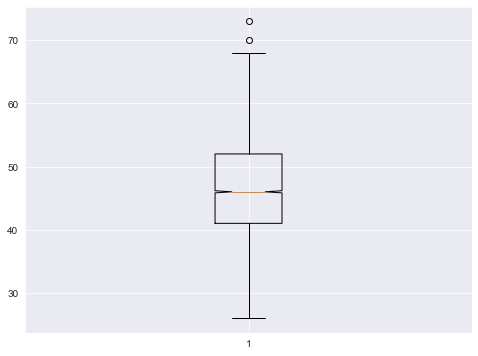

In [57]:
fig = plt.figure(figsize=(8,6))
plt.boxplot(x=data['Customer_Age'],notch=True)
print('We can notice that,\n1. All the people are less than approx. 75 years,\n2. 75% of the people are above 40 years.\n3. The least age approximates to ~25.\n An obvious inference is that only people who are bigger than 25 years, have credit cards.\n ')

We can infer that as the age feature follows a normal distribution we can further use age with normality assumption.


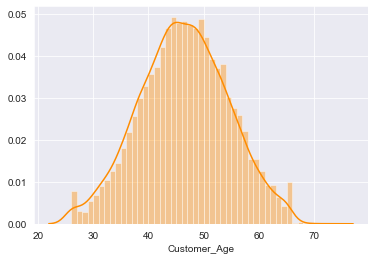

In [58]:
sns.distplot(data["Customer_Age"],color="darkorange")
print('We can infer that as the age feature follows a normal distribution we can further use age with normality assumption.')

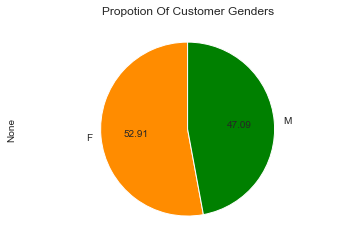

The percentage difference b/w the two is not that significant, so we can say that genders are uniformly distributed.


In [59]:
plt.axis('equal')
plt.title('Propotion Of Customer Genders')
data.groupby('Gender').size().plot(autopct='%0.2f',kind='pie',startangle=90,colors=['darkorange','Green'])
plt.show()
print('The percentage difference b/w the two is not that significant, so we can say that genders are uniformly distributed.')

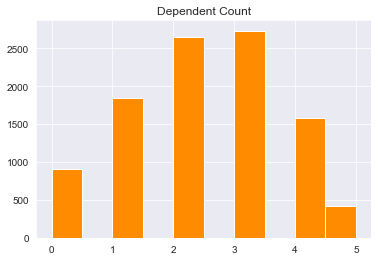

The distribution of Dependent counts is fairly normally distributed with a slight right skew.


In [60]:
plt.title('Dependent Count')
plt.hist(data["Dependent_count"],color=['darkorange'])
plt.show()
print('The distribution of Dependent counts is fairly normally distributed with a slight right skew.')

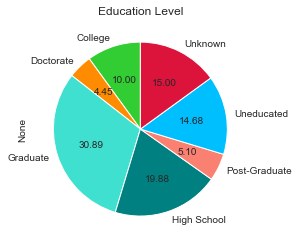

If most of the customers with unknown education status lack any education, we can state that more than 70% of the customers have a formal education level. About 35% have a higher level of education.


In [61]:
plt.title('Education Level')
colors = ['limegreen','darkorange','turquoise','teal','salmon','deepskyblue','crimson']
data.groupby('Education_Level').size().plot(autopct='%0.2f',kind='pie',startangle=90,colors=colors)
plt.show()
print('If most of the customers with unknown education status lack any education, we can state that more than 70% of the customers have a formal education level. About 35% have a higher level of education.')

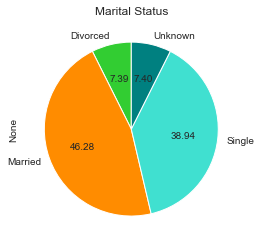

Almost half of the bank customers are married, and interestingly enough, almost the entire other half are single customers.


In [62]:
plt.title('Marital Status')
data.groupby('Marital_Status').size().plot(autopct='%0.2f',kind='pie',startangle=90,colors=colors)
plt.show()
print('Almost half of the bank customers are married, and interestingly enough, almost the entire other half are single customers.')

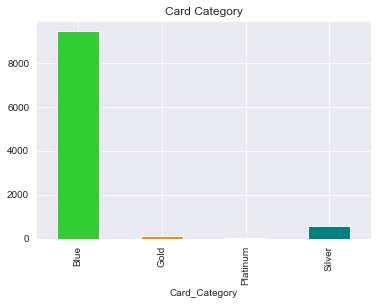

It can be easily noted that Blue card customers are the maximum, which is most basic card, followed by Silver and then Gold.


In [63]:
plt.title('Card Category')
data.groupby('Card_Category').size().plot(kind='bar',color=colors)
plt.show()
print('It can be easily noted that Blue card customers are the maximum, which is most basic card, followed by Silver and then Gold.')

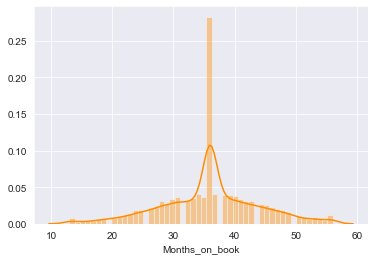

Kurtosis value of Months_on_book features is : 0.40010012019986707
We have a low kurtosis value pointing to a very flat shaped distribution (as shown in the plots above as well), meaning we cannot assume normality of the feature.


In [64]:
sns.distplot(data["Months_on_book"],color="darkorange")
plt.show()
print('Kurtosis value of Months_on_book features is : {}'.format(data['Months_on_book'].kurt()))
print('We have a low kurtosis value pointing to a very flat shaped distribution (as shown in the plots above as well), meaning we cannot assume normality of the feature.')

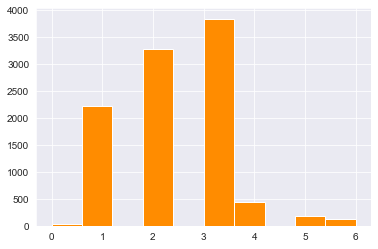

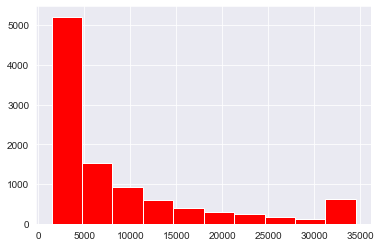

Months_Inactive_12_mon is left skewed while Credit_Limit doesn't follow a normal distribution


In [65]:
plt.hist(data["Months_Inactive_12_mon"],color=['darkorange'])
plt.show()
plt.hist(data["Credit_Limit"],color=['red'])
plt.show()
print("Months_Inactive_12_mon is left skewed while Credit_Limit doesn't follow a normal distribution")

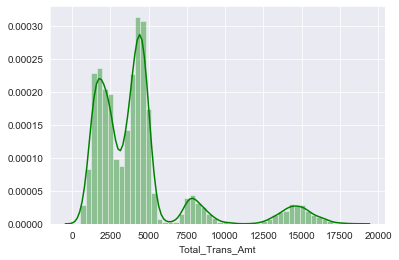

It can be seen that this is a multimodal distribution which implies we might have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.


In [66]:
sns.distplot(data["Total_Trans_Amt"],color="green")
plt.show()
print('It can be seen that this is a multimodal distribution which implies we might have some underlying groups in our data; it can be an interesting experiment to try and cluster the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.')

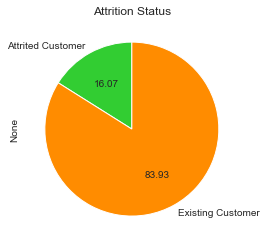

It can be seen that 16% are attrited customers.


In [67]:
plt.title('Attrition Status')
data.groupby('Attrition_Flag').size().plot(autopct='%0.2f',kind='pie',startangle=90,colors=colors)
plt.show()
print('It can be seen that 16% are attrited customers.')

### NOTE:
We shall use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.

### Data Preprocessing

In [68]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [70]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [71]:
cols = ['Education_Level','Income_Category','Marital_Status']
for i in cols:
    unknown = 0
    for j in data[i]:
        if j == "Unknown":
            unknown+=1
    print(data[i].value_counts())
    print(str(unknown)+' number of records from '+i +' are unknown')
    print()
    print()
print('Data length = '+ str(data.shape[0]))

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
1519 number of records from Education_Level are unknown


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
1112 number of records from Income_Category are unknown


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
749 number of records from Marital_Status are unknown


Data length = 10127


In [72]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [73]:
print('Applying label encoding on nominal data and one hot encoding on ordinal data we have:')
# label
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data.Gender = data.Gender.replace({'F':1,'M':0})

Applying label encoding on nominal data and one hot encoding on ordinal data we have:


In [74]:
# one hot
cols = ['Education_Level','Income_Category','Marital_Status']
for i in cols:
    data = pd.concat([data,pd.get_dummies(data[i]).drop(columns=['Unknown'])],axis=1)
# And client Number is waste data which is not needed so we'll drop that as well
data = pd.concat([data,pd.get_dummies(data["Card_Category"]).drop(columns=['Platinum'])],axis=1)
cols+=['CLIENTNUM']+['Card_Category']
data.drop(columns = cols,inplace=True)

In [75]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


Due to the size of data heatmap doesn't help much :/


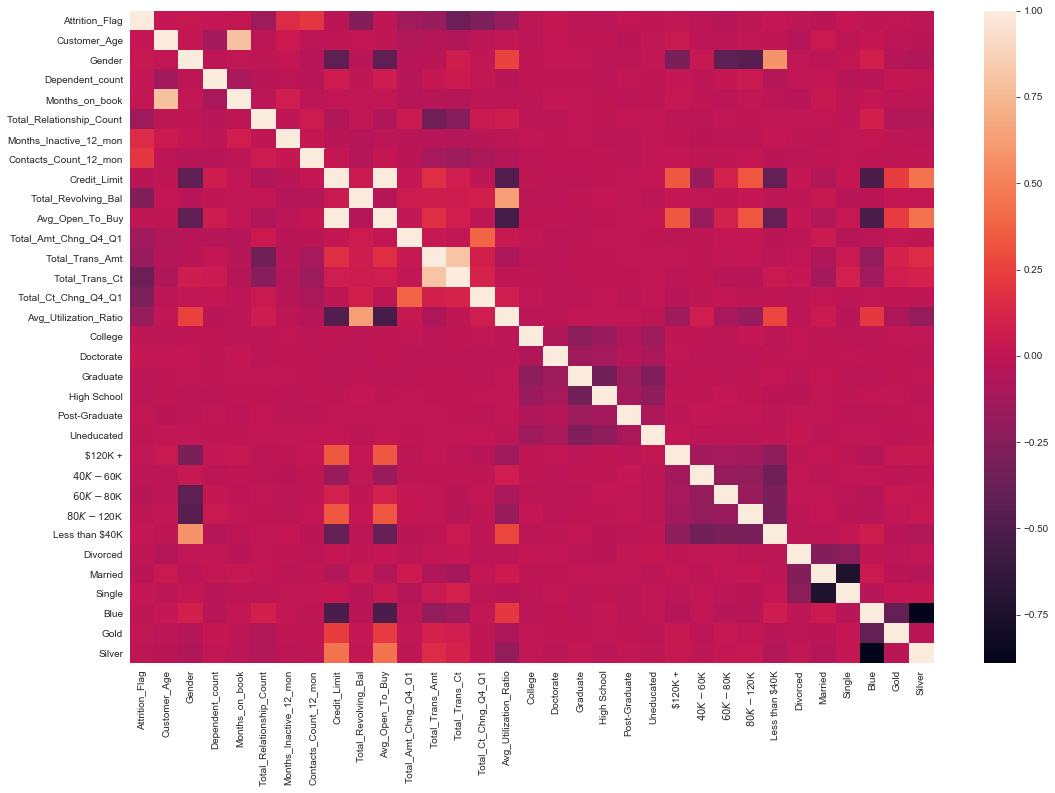

In [76]:
# Pearson Correlation
fig = plt.figure(figsize=(18,12))
sns.heatmap(data.corr('pearson'))
print("Due to the size of data heatmap doesn't help much :/")

## Data Unsampling using SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [78]:
X, y = oversample.fit_resample(data[data.columns[1:]], data[data.columns[0]])
usampled_df = X.assign(Churn = y)

In [79]:
one_hot_encoded_data = usampled_df[usampled_df.columns[15:-1]].copy()
usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

In [80]:
one_hot_encoded_data.head(2)

,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0


## PCA for One Hot Encoded Data

In [81]:
from sklearn.decomposition import PCA

In [82]:
components = 4
pca = PCA(n_components=components)
pc_matrix = pca.fit_transform(one_hot_encoded_data)
pc_matrix.shape

(17000, 4)

In [83]:
new_data = pd.concat([usampled_df,pd.DataFrame(pc_matrix,columns=['PCA-{}'.format(i) for i in range(0,components)])],axis=1)
new_data.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,PCA-0,PCA-1,PCA-2,PCA-3
0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,-0.700770,-0.371063,-0.337793,0.704241
1,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0.720538,0.898896,0.672949,0.140034
2,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,-0.727030,-0.186642,0.861945,0.122543
3,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0.069338,0.608270,-0.639370,0.132888
4,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,-0.679439,-0.344228,-0.193287,0.136173


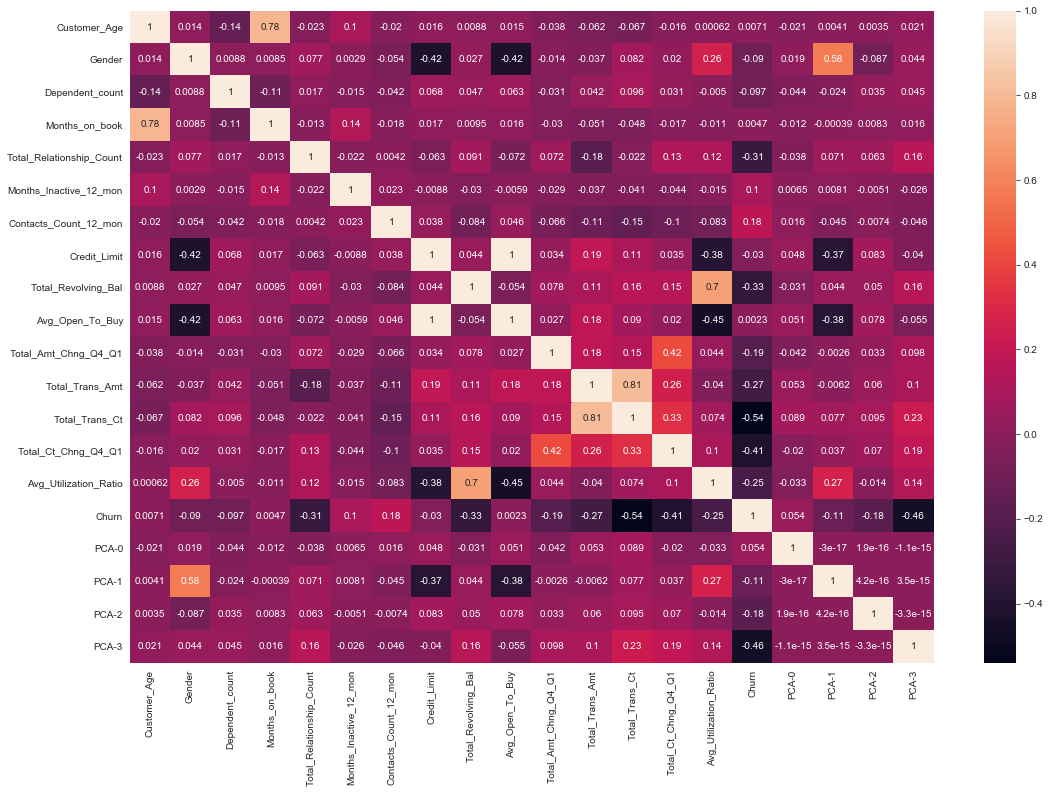

In [84]:
fig = plt.figure(figsize=(18,12))
sns.heatmap(new_data.corr('pearson'),annot=True)
plt.show()

## Model Selection and Evaluation

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [86]:
ranks = SelectKBest(score_func=chi2,k=5)
ordered_features = ranks.fit(new_data.iloc[:,:-5],y)
dfscores = pd.DataFrame(ordered_features.scores_)
dfcols = pd.DataFrame(new_data.columns[:-4])
ranks = pd.concat([dfscores,dfcols],axis = 1)
ranks.columns = ['Score','Features']
ranks.nlargest(10,'Score')

,Score,Features
11,2.893672e+06,Total_Trans_Amt
8,1.574630e+06,Total_Revolving_Bal
7,1.541378e+05,Credit_Limit
12,4.422178e+04,Total_Trans_Ct
4,1.096042e+03,Total_Relationship_Count
9,1.010483e+03,Avg_Open_To_Buy
14,3.470021e+02,Avg_Utilization_Ratio
13,2.414587e+02,Total_Ct_Chng_Q4_Q1
6,2.162049e+02,Contacts_Count_12_mon
2,1.059863e+02,Dependent_count


In [87]:
# Model Selection: Using top 4 features from selectKBest scores and we get other 4 features from PCA done above 
X_features = ['PCA-3','PCA-2','PCA-1','PCA-0','Total_Revolving_Bal','Credit_Limit','Total_Trans_Ct','Total_Trans_Amt']
X = new_data[X_features]
y = new_data['Churn']

In [88]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

In [89]:
# Applying Standard Scaler and creating our Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# AdaBoost
adaBoost = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42)) ])
# Support Vector Machines
svm = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf'))])

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
ada_f1_scores = cross_val_score(adaBoost,train_x,train_y,cv=5,scoring='f1')
svm_f1_scores = cross_val_score(svm,train_x,train_y,cv=5,scoring='f1')

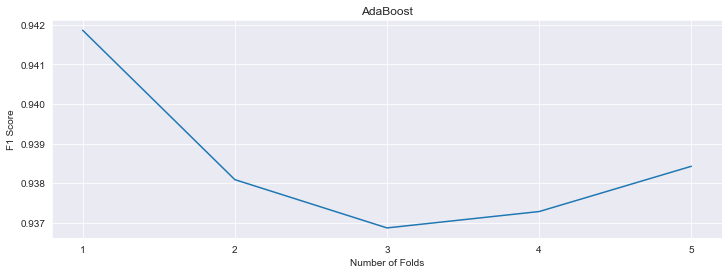

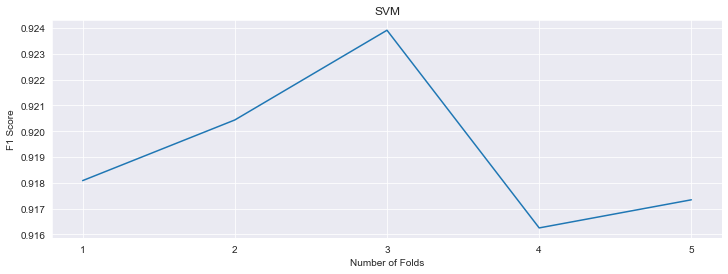

In [92]:
# Plotting F1 score vs number of folds graph in cross validation:
f1_scores = [ada_f1_scores,svm_f1_scores]
f1_score_names = ['AdaBoost','SVM']
for idx,i in enumerate(f1_scores):
    plt.figure(figsize=(12,4))
    ax = sns.lineplot(x=range(1,6),y=i)
    ax.set_title(f1_score_names[idx])
    ax.set_xticks([i for i in range(1,6)])
    ax.set_xlabel('Number of Folds')
    ax.set_ylabel('F1 Score')
    plt.show()

## Evaluating the Model

In [93]:
from sklearn.metrics import f1_score

adaBoost.fit(train_x,train_y)
ada_preds = adaBoost.predict(test_x)
print('F1 Score of AdaBoost Model On Test Data: {}'.format(f1_score(ada_preds,test_y)))

svm.fit(train_x,train_y)
svm_preds = svm.predict(test_x)
print('F1 Score of SVM Model On Test Data: {}'.format(f1_score(svm_preds,test_y)))

F1 Score of AdaBoost Model On Test Data: 0.9386603995299647
F1 Score of SVM Model On Test Data: 0.9280338664158044


### Compare this F1 score with the case if we didn't use SMOTE

In [96]:
one_hot_encoded_data = data[data.columns[16:]].copy()
pc_matrix = pca.fit_transform(one_hot_encoded_data)
original_df = pd.concat([data,pd.DataFrame(pc_matrix,columns=['PCA-{}'.format(i) for i in range(0,components)])],axis=1)
new_X = original_df[X_features]

In [106]:
new_X

,PCA-3,PCA-2,PCA-1,PCA-0,Total_Revolving_Bal,Credit_Limit,Total_Trans_Ct,Total_Trans_Amt
0,-0.680086,-0.514912,-0.501283,-0.672478,777,12691.0,42,1144
1,-0.155156,0.551827,0.844682,0.760635,864,8256.0,33,1291
2,-0.135401,0.793039,-0.206848,-0.697175,0,3418.0,20,1887
3,-0.602813,-0.742723,0.525533,0.081685,2517,3313.0,20,1171
4,0.664882,-0.255856,-0.409517,-0.657038,0,4716.0,28,816
...,...,...,...,...,...,...,...,...
10122,-0.073335,0.856640,-0.337591,0.734538,1851,4003.0,117,15476
10123,0.245646,0.001167,-0.540961,0.071590,2186,4277.0,69,8764
10124,-0.619675,-0.758884,0.549550,-0.636122,0,5409.0,60,10291
10125,-0.033559,0.841284,-0.328390,0.040337,0,5281.0,62,8395


In [109]:
new_Y = original_df['Attrition_Flag']

In [111]:
print(new_X.shape)
print(new_Y.shape)

(10127, 8)
(10127,)


In [112]:
new_train_x,new_test_x,new_train_y,new_test_y = train_test_split(new_X,original_df['Attrition_Flag'],random_state=42)

In [113]:
adaBoost.fit(new_train_x,new_train_y)
new_ada_preds = adaBoost.predict(new_test_x)
print('F1 Score of AdaBoost Model On Original Data (Before SMOTE) - {}'.format(f1_score(new_ada_preds,new_test_y)))

svm.fit(new_train_x,new_train_y)
new_svm_preds = svm.predict(new_test_x)
print('F1 Score of SVM Model On Original Data (Before SMOTE) - {}'.format(f1_score(new_svm_preds,new_test_y)))

F1 Score of AdaBoost Model On Original Data (Before SMOTE) - 0.7412223667100131
F1 Score of SVM Model On Original Data (Before SMOTE) - 0.626950354609929


## Lastly

4250 = size of our test data


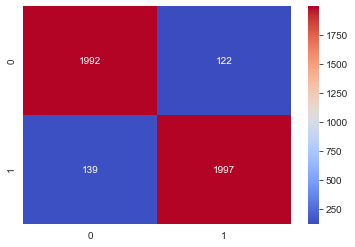

In [124]:
print('{} = size of our test data'.format(len(ada_preds)))
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ada_preds,test_y),annot=True,cmap='coolwarm',fmt='g')
ax.set_title('Prediction On Original Data using AdaBoost Confusion Matrix')
ax.set_xticklabels(['Not Churn','Churn'],fontsize=22)
ax.set_yticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=16)
plt.show()

In [126]:
import scikitplot as skplt

<Figure size 720x576 with 0 Axes>

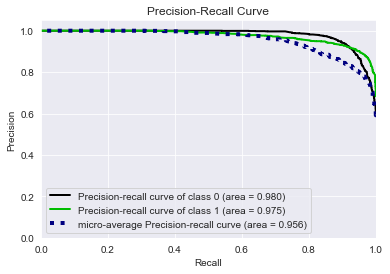

In [131]:
sampled_preds = adaBoost.predict_proba(test_x)
skplt.metrics.plot_precision_recall(test_y, sampled_preds)